In [237]:
import numpy as np
import matplotlib.pyplot as plt

def compute_gradients(inputs, weights, y_true):
    # Forward pass
    z = np.dot(inputs, weights)
    y_pred = sigmoid(z)
    #y_pred = relu(z)
    # Compute loss
    loss = binary_cross_entropy_loss(y_pred, y_true)
    # Backward pass
    d_loss = binary_cross_entropy_derivative(y_pred, y_true) # Gradient of loss w.r.t. y_pred
    d_activation = sigmoid_derivative(z)# Gradient of sigmoid w.r.t. z
    #d_activation = relu_derivative(z)
    # Gradients for weights and bias
    #d_weights = d_loss * d_activation * inputs # Chain rule: dL/dw
    d_weights = np.dot((d_loss * d_activation).T, inputs) / np.shape(inputs)[0]
    return d_weights, loss.mean(), y_pred

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1. * (x > 0)

# Es importante notar que para este caso NO podemos usar la step
# function como función de activación ya que no es derivable, por eso uitilizamos la sigmoidea.

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Binary cross-entropy loss function
def binary_cross_entropy_loss(y_pred, y_true):
    return -(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

# LF derivative
def binary_cross_entropy_derivative(y_pred, y_true):
    return y_pred - y_true

def optimizacion(old_value, gradient, LR):
    new_value = old_value - gradient * LR
    return new_value

In [263]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Add bias column
inputs = np.hstack([np.ones((4, 1)),inputs])
y = np.array([[0, 1, 1, 1]])
y = y.reshape(4)
init_w = np.random.rand(3)
init_w[0] = 0

In [264]:
epochs = 10000
weights = init_w
losses = []
for epoch in range(epochs):
    d_weights, loss, y_hat = compute_gradients(inputs, weights, y)
    losses.append(loss)
    weights = optimizacion(weights, d_weights, 10)

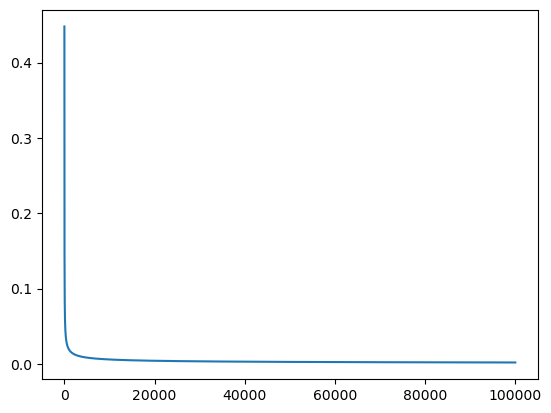

In [265]:
plt.plot(losses)
plt.show()

In [266]:
sigmoid(np.dot(inputs, weights))

array([0.00318019, 0.99799004, 0.99799004, 0.99999999])